#  Integrated Evaluation of Reservoir Properties: Total Porosity, Permeability, Water Saturation, NTG Ratios, and Empirical Porosity-Permeability Relationships

Steps involved:

Optimize Total Porosity Calculation:

Calibrate neutron and density logs with core data.
Compute total porosity using calibrated logs.
Validate and plot results.

Calculate Water Saturation:

Use Archie and Simandoux methods.
Compare and plot water saturation results.

Estimate NTG Ratio:

Apply cutoffs for Vsh, porosity, and water saturation.
Calculate and plot NTG.

Build Empirical Porosity-Permeability Relationship:

Filter core data and build empirical relationship.
Compute continuous permeability profile and validate.

These steps will help you refine the analysis and achieve accurate results for reservoir evaluation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lasio
import seaborn as sns
las=lasio.read(r"C:\Users\RAJKUMAR MONDAL\OneDrive\Books and notes all sem\Formation Evoluation\formation case study log data\gorgonichthys_1_wire_public_2010_sdb (1).las")

In [2]:
## curve information
print(las.curves)

Mnemonic  Unit  Value  Description                                                            
--------  ----  -----  -----------                                                            
DEPTH     M                                                                                   
BS        IN           Values changed using TEXT_EDIT                                         
CALI      IN           Values changed using TEXT_EDIT                                         
DENS      G/C3         5       Bulk Density                                                   
DENSC     G/C3         12      Bulk Density Correction                                        
DRHO      G/C3         12      Bulk Density Correction                                        
DT        US/F         Curve clear from 3924.64 to 3930.54                                    
DTCO      US/F         Curve clear from 3924.64 to 3930.54                                    
DTSH      US/F         Curve clear from 3872.27 to

In [3]:
## converted the las file into data frame

df=las.df().reset_index()
df.head()


,DEPTH,BS,CALI,DENS,DENSC,DRHO,DT,DTCO,DTSH,DTSM,...,PEF,PR,RESD,RESM,RESS,RHOB,TENS,TNPH,U,VPVS
0,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.1524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.3048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.4572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.6096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Our zone of interest in between 3911.5 m to 4218 m

In [6]:
## make a data frame in the interested zone.
data=df[(df["DEPTH"]>=3911.5) & (df["DEPTH"]<=4218)]

# Quality check of logs, outliers identification and outliers removal.

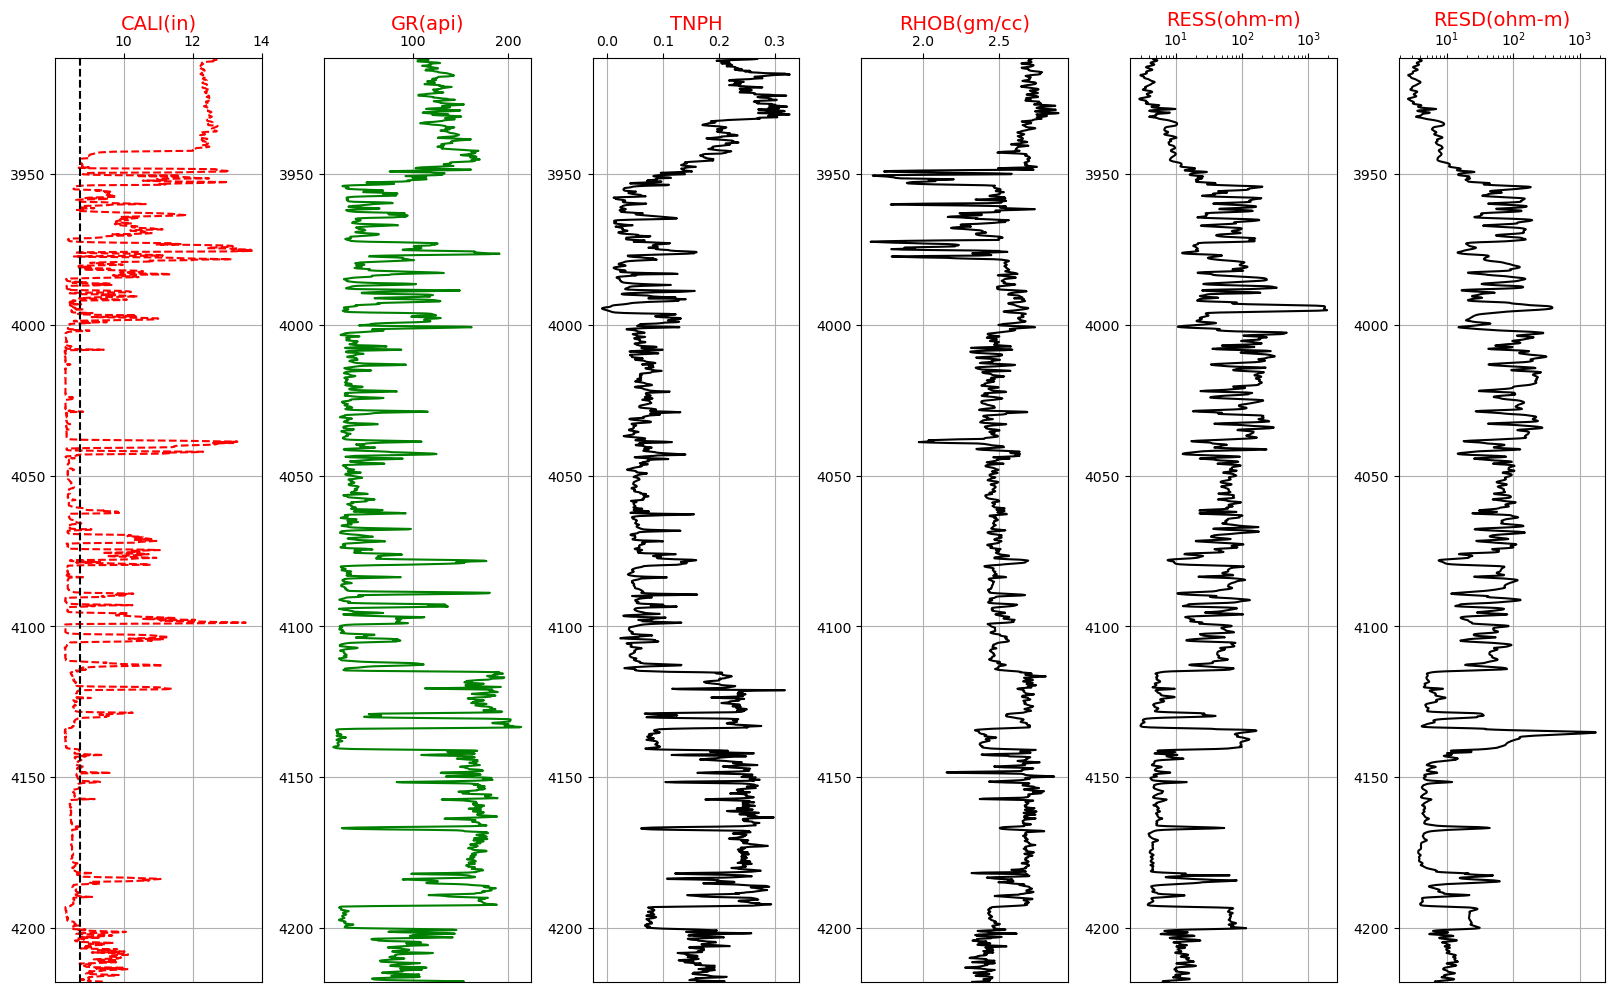

In [23]:
## Quality check of borehole data by using caliper log and bit size of the drill hole


# Create a figure with 1 row and 6 columns for subplots
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20, 12))
plt.subplots_adjust(wspace=0.3)  # Adjust space between plots

# Plot 1: CALI vs Depth
ax1 = axes[0]  # Correct index for subplot
ax1.plot(data.CALI, data.DEPTH, color="red", linestyle='dashed')
ax1.set_ylim(4218, 3911.5)
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")
ax1.set_xlabel("CALI(in)", color="red", fontsize=14)
ax1.axvline(8.75, linestyle='dashed', color="k")
ax1.grid()

# Plot 2: GR vs Depth
ax2 = axes[1]  # Correct index for subplot
ax2.plot(data.GR, data.DEPTH, color="green")
ax2.set_ylim(4218, 3911.5)
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position("top")
ax2.set_xlabel("GR(api)", color="red", fontsize=14)
ax2.grid()

# Plot 3: TNPH vs Depth
ax3 = axes[2]  # Correct index for subplot
ax3.plot(data.TNPH, data.DEPTH, color="black")
ax3.set_ylim(4218, 3911.5)
ax3.xaxis.set_label_position("top")
ax3.xaxis.set_ticks_position("top")
ax3.set_xlabel("TNPH", color="red", fontsize=14)
ax3.grid()

# Plot 4: RHOB vs Depth
ax4 = axes[3]  # Correct index for subplot
ax4.plot(data.RHOB, data.DEPTH, color="black")
ax4.set_ylim(4218, 3911.5)
ax4.xaxis.set_label_position("top")
ax4.xaxis.set_ticks_position("top")
ax4.set_xlabel("RHOB(gm/cc)", color="red", fontsize=14)
ax4.grid()

# Plot 5: RESS vs Depth
ax5 = axes[4]  # Correct index for subplot
ax5.plot(data.RESS, data.DEPTH, color="black")
ax5.set_ylim(4218, 3911.5)
ax5.set_xscale('log')  # Use log scale
ax5.xaxis.set_label_position("top")
ax5.xaxis.set_ticks_position("top")
ax5.set_xlabel("RESS(ohm-m)", color="red", fontsize=14)
ax5.grid()

# Plot 6: RESD vs Depth
ax6 = axes[5]  # Correct index for subplot
ax6.plot(data.RESD, data.DEPTH, color="black")
ax6.set_ylim(4218, 3911.5)
ax6.set_xscale('log')  # Use log scale for the x-axis
ax6.xaxis.set_label_position("top")
ax6.xaxis.set_ticks_position("top")
ax6.set_xlabel("RESD(ohm-m)", color="red", fontsize=14)
ax6.grid()


INTERPRETATION: 

The interpretation of the well log data involves identifying zones affected by poor borehole conditions, which can be detected using a caliper log plotted alongside the bit size. If the caliper log shows significant deviation from the bit size, these intervals can be flagged as zones with bad borehole conditions. Further analysis should focus on examining these identified zones for any anomalies or spikes in other logs, such as gamma ray, resistivity, density, or neutron porosity logs. Such correlations may indicate the impact of borehole irregularities on the quality and reliability of the log measurements, necessitating careful consideration during formation evaluation and reservoir characterization.

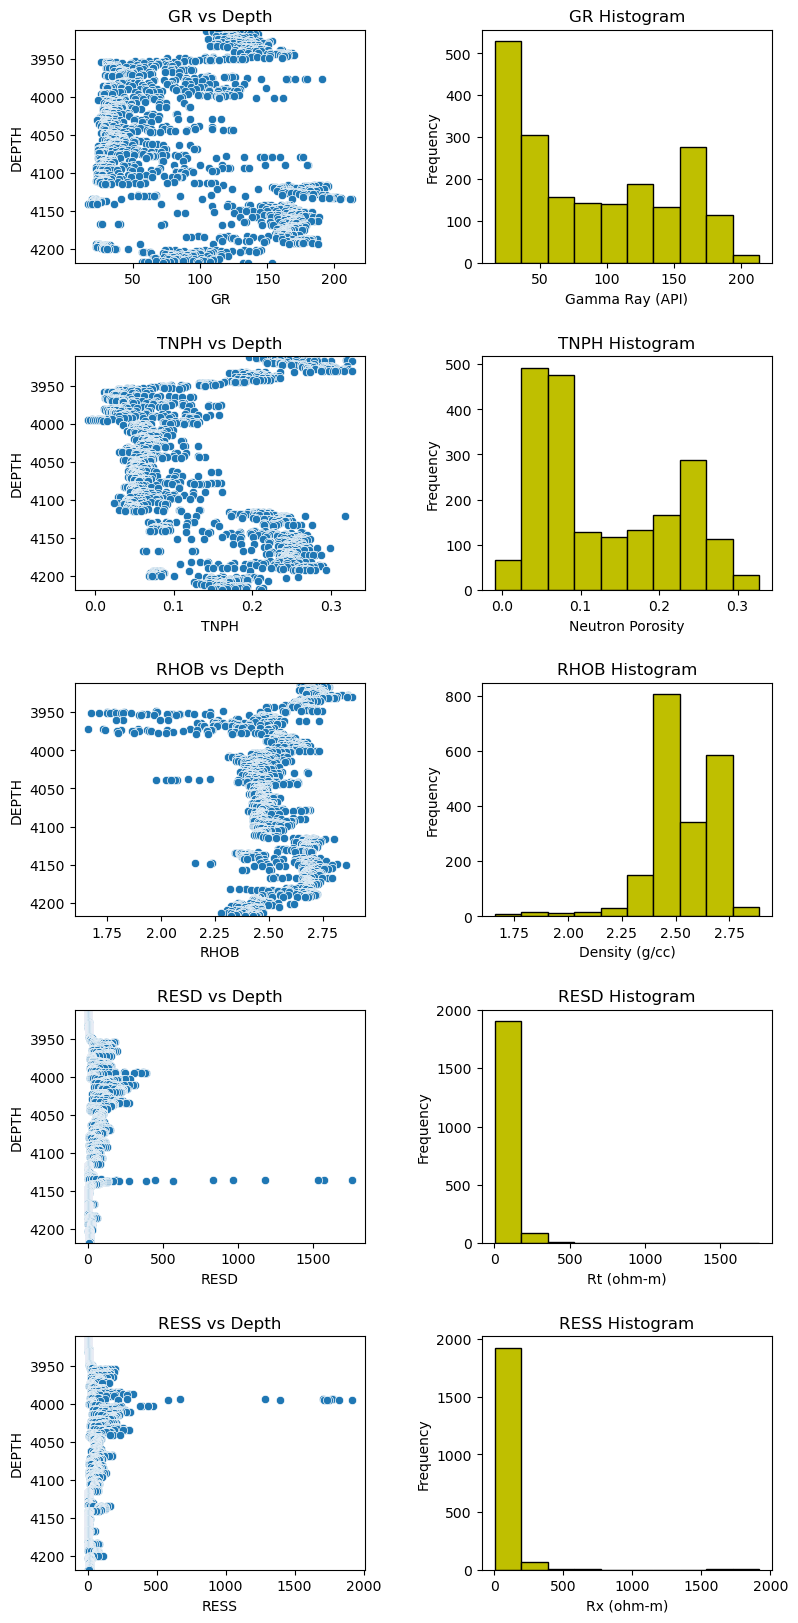

In [24]:
## Outliers identification using Histogram and scattered plots.

# Create a figure with 5 rows and 2 columns for subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(9, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Adjust space between plots

# Plot 1: GR vs Depth Scatter and Histogram
sns.scatterplot(ax=axes[0, 0], x=data.GR, y=data.DEPTH)
axes[0, 0].set_ylim(4218, 3911.5)
axes[0, 0].set_title("GR vs Depth")
data.GR.plot(kind="hist", edgecolor="k", color="y", ax=axes[0, 1])
axes[0, 1].set_xlabel("Gamma Ray (API)")
axes[0, 1].set_title("GR Histogram")

# Plot 2: TNPH vs Depth Scatter and Histogram
sns.scatterplot(ax=axes[1, 0], x=data.TNPH, y=data.DEPTH)
axes[1, 0].set_ylim(4218, 3911.5)
axes[1, 0].set_title("TNPH vs Depth")
data.TNPH.plot(kind="hist", edgecolor="k", color="y", ax=axes[1, 1])
axes[1, 1].set_xlabel("Neutron Porosity")
axes[1, 1].set_title("TNPH Histogram")

# Plot 3: RHOB vs Depth Scatter and Histogram
sns.scatterplot(ax=axes[2, 0], x=data.RHOB, y=data.DEPTH)
axes[2, 0].set_ylim(4218, 3911.5)
axes[2, 0].set_title("RHOB vs Depth")
data.RHOB.plot(kind="hist", edgecolor="k", color="y", ax=axes[2, 1])
axes[2, 1].set_xlabel("Density (g/cc)")
axes[2, 1].set_title("RHOB Histogram")

# Plot 4: RESD vs Depth Scatter and Histogram
sns.scatterplot(ax=axes[3, 0], x=data.RESD, y=data.DEPTH)
axes[3, 0].set_ylim(4218, 3911.5)
axes[3, 0].set_title("RESD vs Depth")
data.RESD.plot(kind="hist", edgecolor="k", color="y", ax=axes[3, 1])
axes[3, 1].set_xlabel("Rt (ohm-m)")
axes[3, 1].set_title("RESD Histogram")

# Plot 5: RESS vs Depth Scatter and Histogram
sns.scatterplot(ax=axes[4, 0], x=data.RESS, y=data.DEPTH)
axes[4, 0].set_ylim(4218, 3911.5)
axes[4, 0].set_title("RESS vs Depth")
data.RESS.plot(kind="hist", edgecolor="k", color="y", ax=axes[4, 1])
axes[4, 1].set_xlabel("Rx (ohm-m)")
axes[4, 1].set_title("RESS Histogram")

plt.show()

INTERPRETATION: 

The scatter and histogram plots provide a visual means of identifying outliers in well log data. In histogram plots, outliers are represented by data points that occur with low frequency, often appearing as isolated bars at the extreme ends of the distribution. These data points deviate significantly from the central tendency and indicate rare or abnormal measurements.

Similarly, in scatter plots, outliers can be detected as data points that deviate from the overall trend or clustering pattern. These points typically lie outside the main trend, indicating potential anomalies, errors, or unique geological features. Identifying and analyzing these outliers is crucial as they can impact the accuracy of formation evaluation, reservoir characterization, and subsequent decision-making processes. Properly handling outliers—whether by further investigation, correction, or exclusion—ensures a more robust and reliable interpretation of subsurface data.

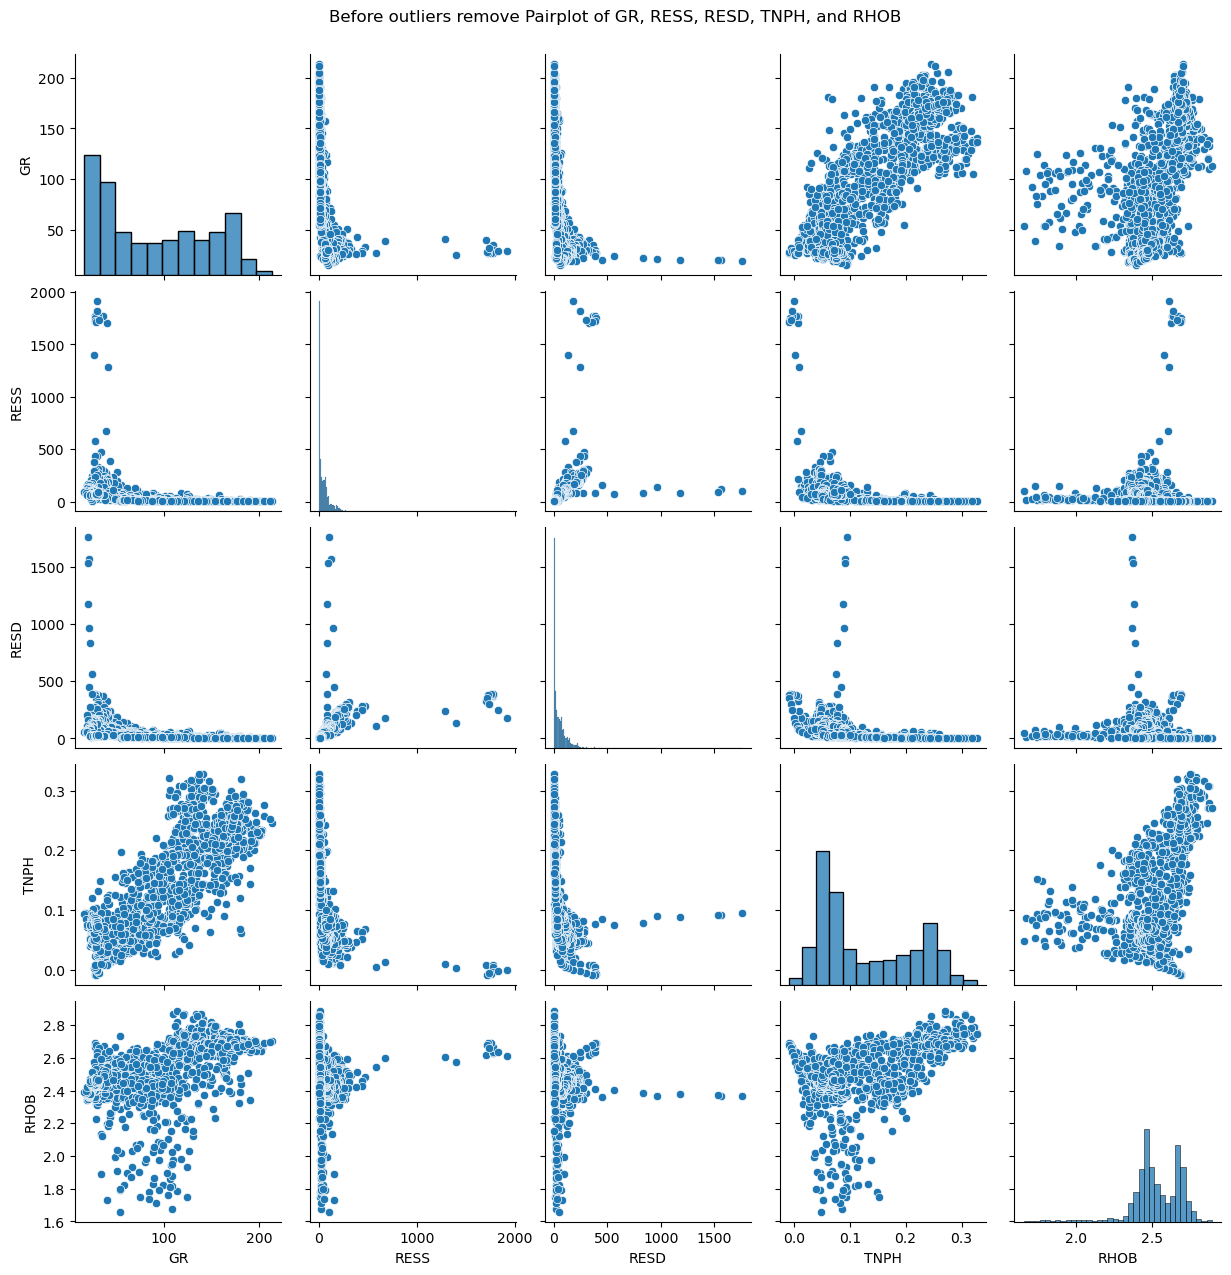

In [26]:
## outliers identification by using pairplot.

selected_columns = ['GR', 'RESS', 'RESD', 'TNPH', 'RHOB']
logs = data[selected_columns]

# Generate a pair plot for the selected columns
sns.pairplot(logs)
plt.suptitle("Before outliers remove Pairplot of GR, RESS, RESD, TNPH, and RHOB", y=1.02)  # Add title with some padding
plt.show()

INTERPRETATION:

Outliers in Scatter Plots: 

Data points that are away from the main trend could indicate anomalies that need further investigation.

Outliers in KDE Plots: 

Peaks at the ends of the distribution curves with low density indicate outliers.

By visually inspecting these plots, you can identify potential outliers and further analyze them to understand their cause and impact on your data analysis.









# Outliers removal

In [27]:
## Normalise the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
logs_norm = scaler.fit_transform(logs)
logs_norm = pd.DataFrame(logs_norm, columns=logs.columns)

logs_norm.columns

Index(['GR', 'RESS', 'RESD', 'TNPH', 'RHOB'], dtype='object')

In [50]:
## outliers removal after normalise the data set

from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
# Assuming 'logs' is your DataFrame
logs_std = logs_norm[np.abs(logs_norm -logs_norm.mean()) <= (3 * logs_norm.std())]



# Method 2: Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(logs_norm)
mask = yhat != -1
logs_iso = logs_norm[mask]

# Method 3: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.1)
yhat = ee.fit_predict(logs_norm)
mask = yhat != -1
logs_ee = logs_norm[mask]

# Method 4: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3)
yhat = lof.fit_predict(logs_norm)
mask = yhat != -1
logs_lof = logs_norm[mask]

# Method 5: One-class SVM
svm = OneClassSVM(nu=0.1)
yhat = svm.fit_predict(logs_norm)
mask = yhat != -1
logs_svm = logs_norm[mask]

C:\Users\RAJKUMAR MONDAL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of points before outliers removed                       : 2011
Number of points after outliers removed with Standard Deviation: 2011
Number of points after outliers removed with Isolation Forest  : 1810
Number of points after outliers removed with Min. Covariance   : 1810
Number of points after outliers removed with Outlier Factor    : 1408
Number of points after outliers removed with One-class SVM     : 1812


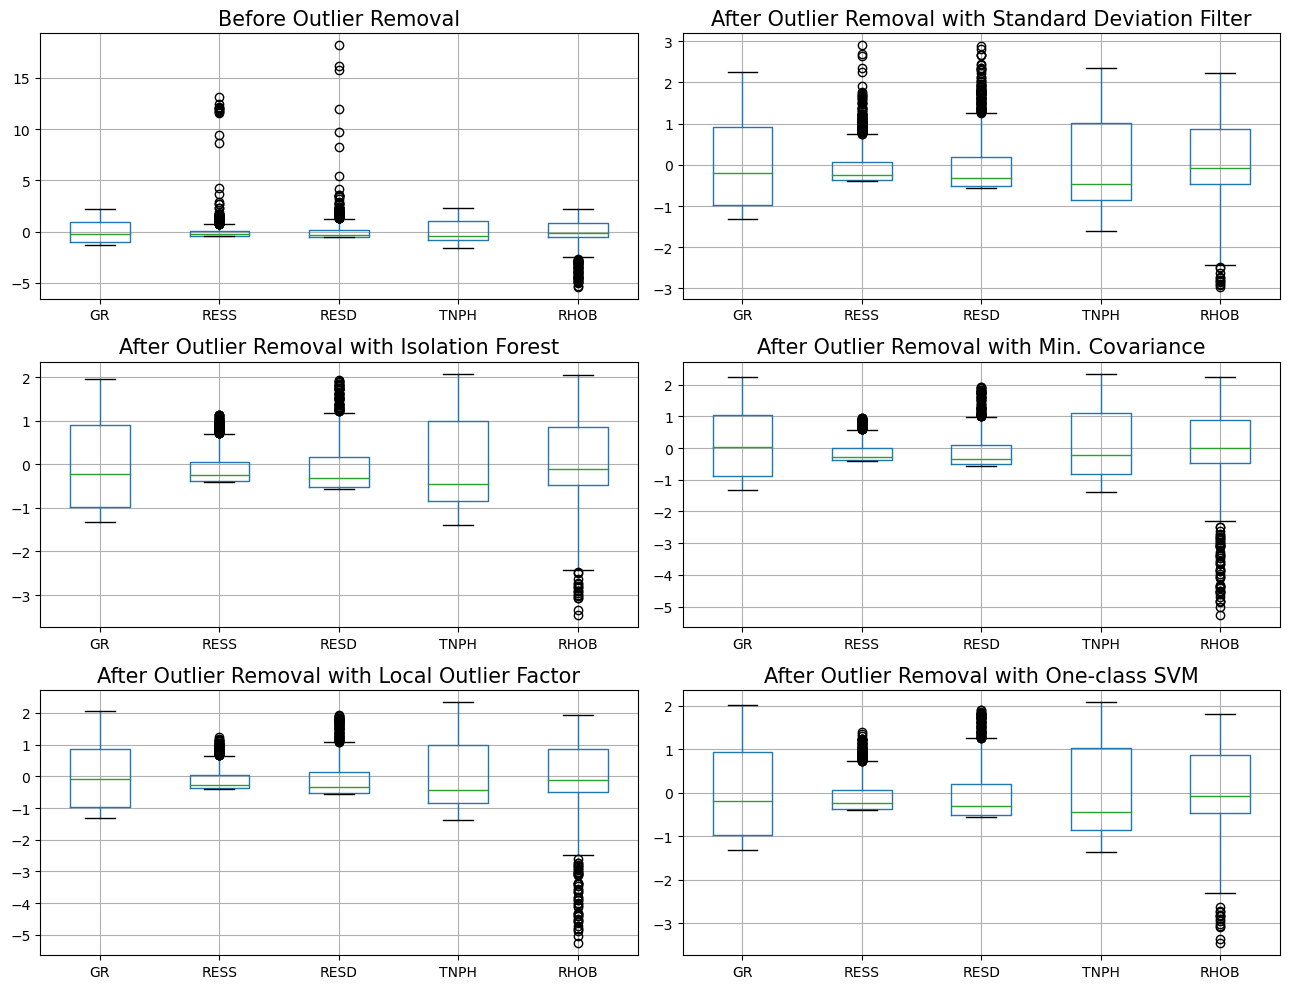

In [51]:
## visualisation of data set before and after outliers senario.


print('Number of points before outliers removed                       :', len(logs_norm))
print('Number of points after outliers removed with Standard Deviation:', len(logs_std))
print('Number of points after outliers removed with Isolation Forest  :', len(logs_iso))
print('Number of points after outliers removed with Min. Covariance   :', len(logs_ee))
print('Number of points after outliers removed with Outlier Factor    :', len(logs_lof))
print('Number of points after outliers removed with One-class SVM     :', len(logs_svm))

plt.figure(figsize=(13,10))

plt.subplot(3,2,1)
logs_norm.boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(3,2,2)
logs_std.boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(3,2,3)
logs_iso.boxplot()
plt.title('After Outlier Removal with Isolation Forest', size=15)

plt.subplot(3,2,4)
logs_ee.boxplot()
plt.title('After Outlier Removal with Min. Covariance', size=15)

plt.subplot(3,2,5)
logs_lof.boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(3,2,6)
logs_svm.boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout()
plt.show()

INTERPRETATION: 

Based on various methods for outlier removal, Isolation Forest was selected for its effectiveness in identifying and removing outliers while preserving the integrity of the dataset. The number of data points before applying Isolation Forest was 2,011, and after applying the method, it reduced to 1,810. This indicates that only a minimal number of points were removed, resulting in a cleaner and clearer dataset. Due to its ability to effectively handle outliers with minimal impact on the data distribution, the Isolation Forest output is chosen as the final outlier-removed dataset for further analysis.

In [52]:
# Denormalize logs_svm using the same scaler
logs_iso_denorm = scaler.inverse_transform(logs_iso)
logs_iso_denorm = pd.DataFrame(logs_iso_denorm, columns=logs.columns)

print(logs_iso_denorm.head())

         GR    RESS    RESD     TNPH    RHOB
0  104.1191  4.5468  3.7925  0.25749  2.6969
1  106.1885  4.5093  3.8157  0.26937  2.7043
2  106.8994  4.5837  3.9027  0.25947  2.7113
3  116.2171  4.9349  4.0739  0.23491  2.6979
4  110.3937  5.2588  4.2234  0.21115  2.6928


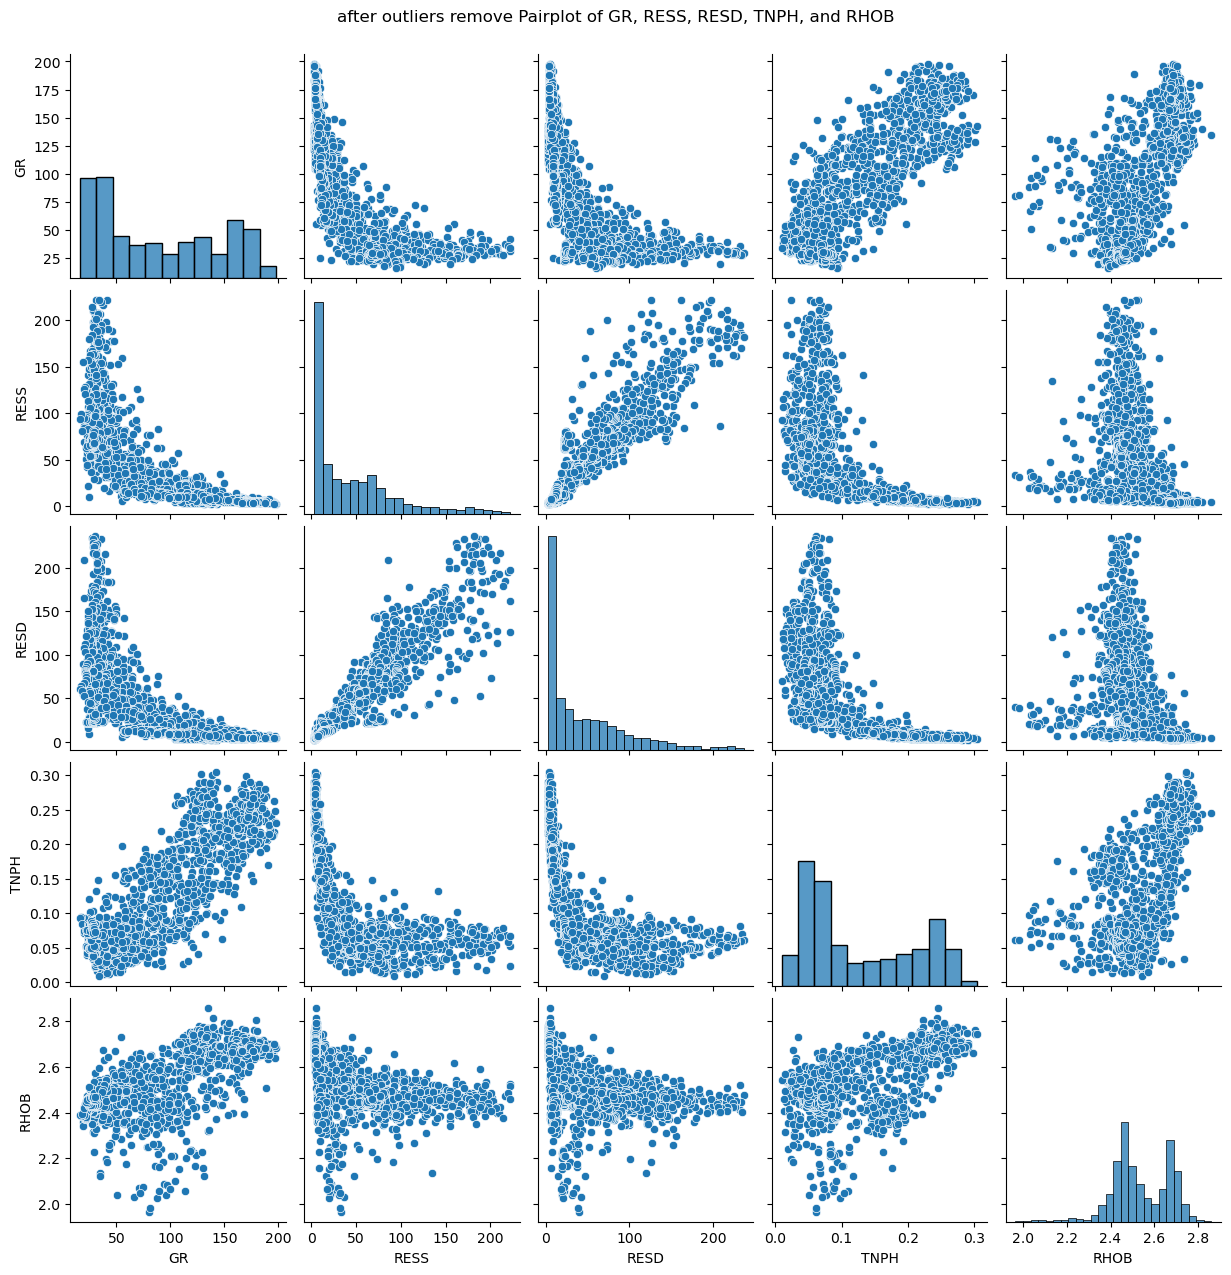

In [54]:
## pair plot after remove the outliers
sns.pairplot(logs_iso_denorm)
plt.suptitle("after outliers remove Pairplot of GR, RESS, RESD, TNPH, and RHOB", y=1.02)  # Add title with some padding
plt.show()

# Add depth column in the removed data set 

In [64]:
## depth column add to the data frame to the output of 
tvd_df1 = data[['DEPTH']].reset_index(drop=True)
logs_remove = pd.concat([logs_iso_denorm, tvd_df1], axis=1)
logs_remove.head()

,GR,RESS,RESD,TNPH,RHOB,DEPTH
0,104.1191,4.5468,3.7925,0.25749,2.6969,3911.6508
1,106.1885,4.5093,3.8157,0.26937,2.7043,3911.8032
2,106.8994,4.5837,3.9027,0.25947,2.7113,3911.9556
3,116.2171,4.9349,4.0739,0.23491,2.6979,3912.1080
4,110.3937,5.2588,4.2234,0.21115,2.6928,3912.2604


# Import the core data

In [82]:
df1=pd.read_csv(r"C:\Users\RAJKUMAR MONDAL\OneDrive\Books and notes all sem\Formation Evoluation\formation case study log data\Core_data.csv")
data1=df1[(df1["DEPTH"]>=3911.5) & (df1['DEPTH']<=4218)]

data1.head()

,Well,Basin,Field,DEPTH,Base depth (m),porosity,Porosity method,Permeability,Permeability method,Bulk density (g/cc),Core number,Grain density (g/cc),Nob pressure (Kpa),Sample Id,Analysis method,Remarks
0,Gorgonichthys 1,Browse,Ichthys,3963.13,NaN,4.3,AMBIENT,0.02,K INF,NaN,1,2,5515.84,2,RCA,NaN
1,Gorgonichthys 1,Browse,Ichthys,3963.13,NaN,4.3,AMBIENT,0.03,K AIR,NaN,1,2,5515.84,3,RCA,NaN
2,Gorgonichthys 1,Browse,Ichthys,3964.13,NaN,4.4,AMBIENT,0.85,K INF,NaN,1,2,5515.84,4,RCA,NaN
3,Gorgonichthys 1,Browse,Ichthys,3964.13,NaN,4.4,AMBIENT,0.97,K AIR,NaN,1,2,5515.84,5,RCA,NaN
4,Gorgonichthys 1,Browse,Ichthys,3964.43,NaN,4.7,AMBIENT,0.03,K INF,NaN,1,2,5515.84,6,RCA,NaN


In [106]:
data1.porosity.shape

(554,)

#  Calibration with core data

Steps to Calibrate Log Data with Core Data

Depth Matching:

Ensure that both the log data and core data are correctly depth-matched. Due to differences in how depth is measured (e.g., driller's depth vs. logger's depth), some depth shifting might be necessary. Proper alignment is critical to ensure that the log data and core data correspond to the same subsurface intervals.

Crossplot Analysis:

Create crossplots between log-derived properties (e.g., neutron porosity from TNPH logs) and core-measured properties (e.g., core porosity). This allows visual inspection of the relationship and identification of any systematic bias or offset between the two datasets.


Apply Correction Functions:

Determine the correction function (linear, polynomial, or more complex) that best fits the relationship between the log and core data. A common approach is a linear calibration:
Calibrated Log Value=a×Log Value+b
where, 
a and b are determined using regression analysis based on the crossplot.

Adjust Log Data:

Apply the derived correction function to the log data to bring it in line with the core data. This involves adjusting the log readings across the entire well interval based on the established correction.

Validate Calibration:

Re-plot the calibrated log data against the core data to ensure a good match. The calibrated log should now closely follow the core measurements, reducing discrepancies and improving the log's reliability for formation evaluation.

Check for Consistency Across Zones:

Ensure that the calibration is consistent across different geological zones. In some cases, different zones may require different calibration functions due to varying formation conditions (e.g., lithology changes, mud invasion).

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_25268\312524672.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1, 2), (0, 0))


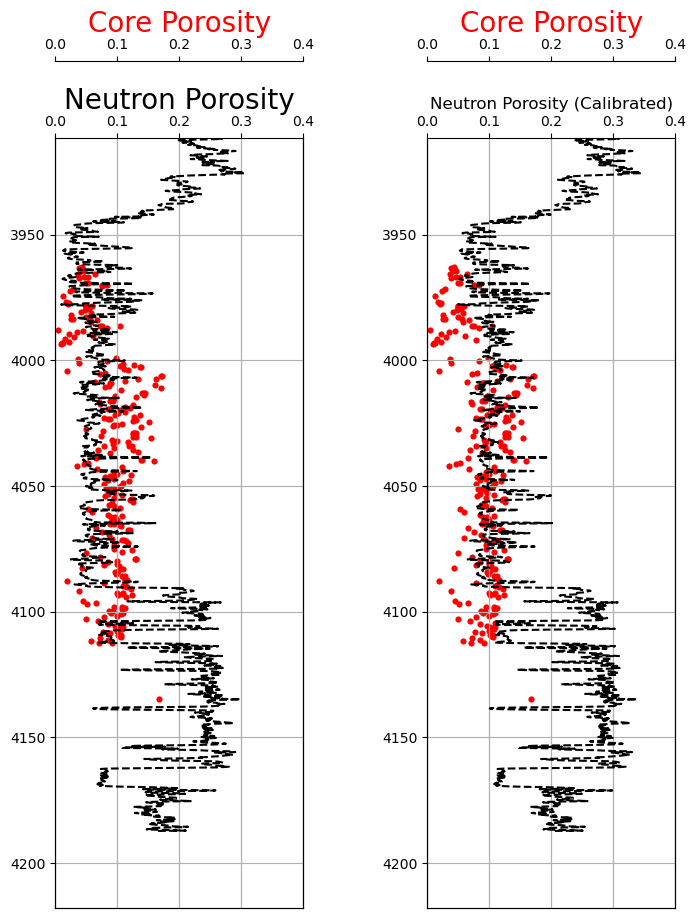

In [105]:
# Create a figure with subplots
fig, _ = plt.subplots(figsize=(8, 10))
plt.subplots_adjust(wspace=0.5)

# Before Calibration: Left side plots
ax2 = plt.subplot2grid((1, 2), (0, 0))
ax3 = ax2.twiny()

# Plot Neutron Porosity (Before Calibration)
ax3.plot(logs_remove.TNPH, logs_remove.DEPTH, color="k", linestyle='dashed')
ax3.set_ylim(4218, 3911.5)
ax3.set_xlim(0, 0.40)
ax3.xaxis.set_label_position("top")
ax3.xaxis.set_ticks_position("top")
ax3.set_xlabel("Neutron Porosity", color="k", fontsize=20)
ax3.grid()

# Plot Core Porosity
ax2.scatter(data1.porosity / 100, data1.DEPTH, color="red",s=10)
ax2.set_ylim(4218, 3911.5)
ax2.set_xlim(0, 0.40)
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position("top")
ax2.set_xlabel("Core Porosity", color="r", fontsize=20)
ax2.spines["top"].set_position(("axes", 1.1))
ax2.grid()

# After Calibration: Right side plots
ax21 = plt.subplot2grid((1, 2), (0, 1))
ax31 = ax21.twiny()

# Plot Neutron Porosity (After Calibration)
ax31.plot(logs_remove.TNPH + 0.04, logs_remove.DEPTH, color="k", linestyle='dashed')
ax31.set_ylim(4218, 3911.5)
ax31.set_xlim(0, 0.40)
ax31.xaxis.set_label_position("top")
ax31.xaxis.set_ticks_position("top")
ax31.set_xlabel("Neutron Porosity (Calibrated)", color="k", fontsize=12)
ax31.grid()

# Plot Core Porosity (same as before)
ax21.scatter(data1.porosity / 100, data1.DEPTH, color="red",s=10)
ax21.set_ylim(4218, 3911.5)
ax21.set_xlim(0, 0.40)
ax21.xaxis.set_label_position("top")
ax21.xaxis.set_ticks_position("top")
ax21.set_xlabel("Core Porosity", color="r", fontsize=20)
ax21.spines["top"].set_position(("axes", 1.1))
ax21.grid()

plt.show()

INTERPRETATION:

Left Plot (Before Calibration): Compares the raw neutron porosity (TNPH) log with core porosity. The deviations between the two suggest areas needing calibration.

Right Plot (After Calibration): Shows the neutron porosity after adjusting with core data. This calibrated plot should align more closely with the core porosity, reflecting more accurate formation properties.

# Calculate the total porosity after calibrate the log porosity with the core porosity

In [140]:
NPHI=(logs_remove.TNPH)+0.04 ## calibration with core porosity

Density porosity calculation: 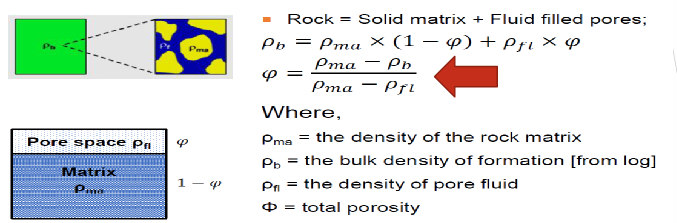

In [115]:
## density porosity calculation

def den_por(ma,bu,fl):
    return ((ma-bu)/(ma-fl))
x=den_por(2.65,logs_remove.RHOB,1)

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_25268\1692249269.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)


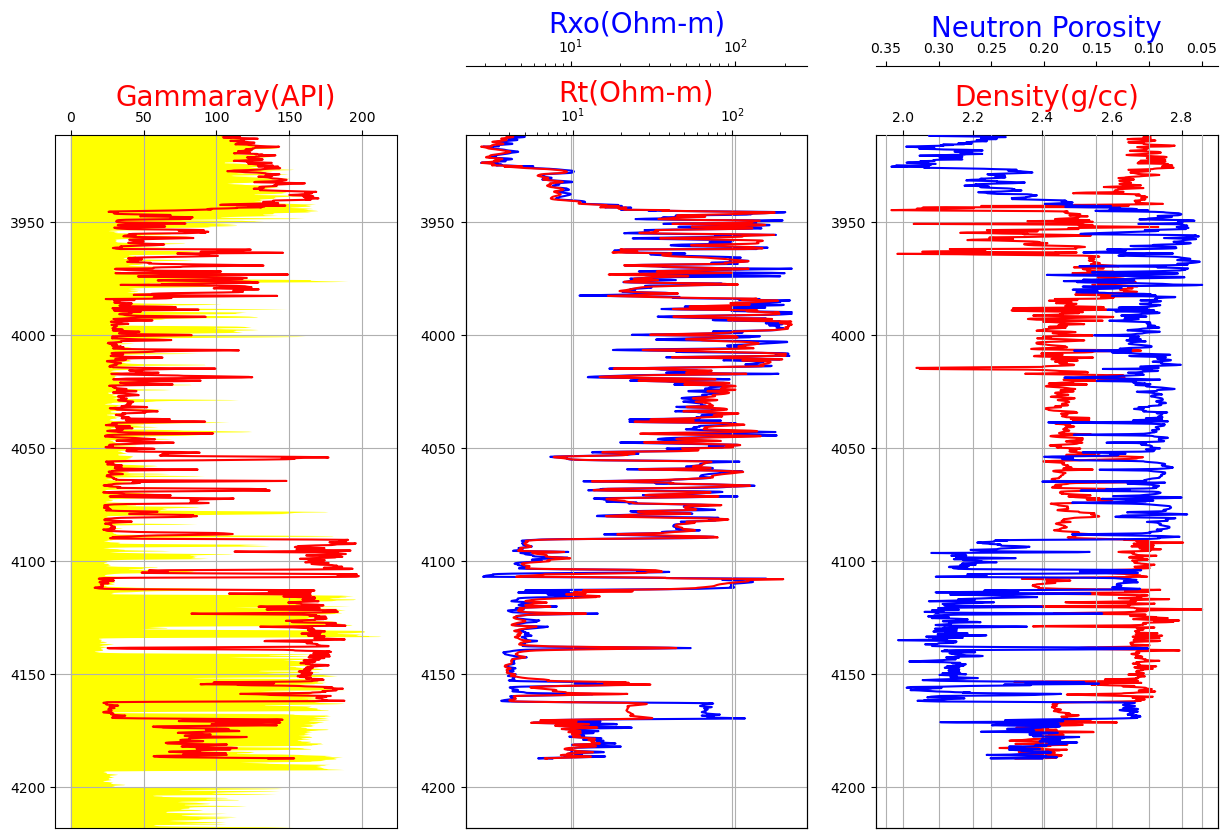

In [117]:
## Zone identification

fig=plt.subplots(figsize=(15,9))
plt.subplots_adjust(wspace=.2)

ax1=plt.subplot2grid((1,3),(0,0),rowspan=1,colspan=1)
ax2=plt.subplot2grid((1,3),(0,1),rowspan=1,colspan=1)
ax3=ax2.twiny()
ax4=plt.subplot2grid((1,3),(0,2),rowspan=1,colspan=1)
ax5=ax4.twiny()


ax3.plot(logs_remove.RESD,logs_remove.DEPTH,color="red")
ax3.set_ylim(4218,3911.5)
ax3.semilogx()
ax3.xaxis.set_label_position("top")
ax3.xaxis.set_ticks_position("top")
ax3.set_xlabel("Rt(Ohm-m)",color="red",fontsize=20)
ax3.grid()

ax2.plot(logs_remove.RESS,logs_remove.DEPTH,color="blue")
ax2.set_ylim(4218,3911.5)
ax2.semilogx()
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position("top")
ax2.set_xlabel("Rxo(Ohm-m)",color="blue",fontsize=20)
ax2.spines["top"].set_position(("axes",1.1))
ax2.grid()

ax1.plot(logs_remove.GR,logs_remove.DEPTH,color="red")
ax1.set_ylim(4218,3911.5)
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")
ax1.set_xlabel("Gammaray(API)",color="red",fontsize=20)
ax1.fill_betweenx(data.DEPTH,0,data.GR,facecolor="yellow")
ax1.grid()

ax4.plot(logs_remove.RHOB,logs_remove.DEPTH,color="red")
ax4.set_ylim(4218,3911.5)
ax4.xaxis.set_label_position("top")
ax4.xaxis.set_ticks_position("top")
ax4.set_xlabel("Density(g/cc)",color="red",fontsize=20)
ax4.grid()

ax5.plot((logs_remove.TNPH)+.04,logs_remove.DEPTH,color="blue")
ax5.set_ylim(4218,3911.5)
ax5.invert_xaxis()
ax5.xaxis.set_label_position("top")
ax5.xaxis.set_ticks_position("top")
ax5.set_xlabel("Neutron Porosity",color="blue",fontsize=20)
ax5.spines["top"].set_position(("axes",1.1))
ax5.grid()


INTERPRETATION:

Based on the observed log characteristics—low Gamma Ray, high resistivity, low density, and low porosity—the interval between 3948 meters and 4095 meters is identified as a gas-bearing zone. This interpretation is consistent with the typical signatures of gas reservoirs and provides a promising indication of hydrocarbon presence in this depth range.

Total porosity calculation: 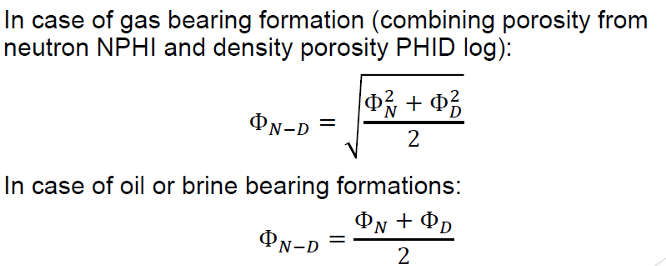

In [118]:
total_por=np.sqrt(((NPHI**2)+(x**2))/2)

0.14338857185182466


C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_25268\2180859616.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax111=plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)


<bound method _AxesBase.grid of <Axes: xlabel='CALI(in)'>>

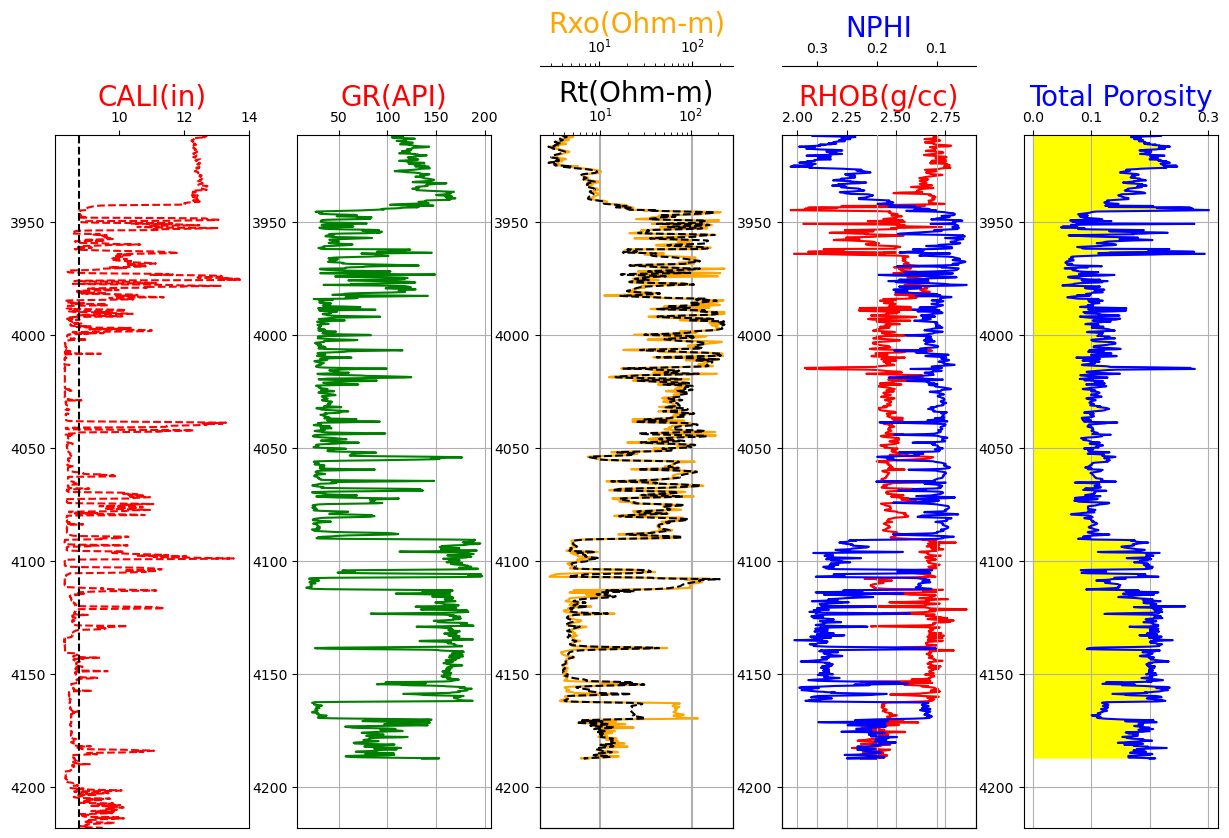

In [141]:
fig=plt.subplots(figsize=(15,9))
plt.subplots_adjust(wspace=.25)

ax111=plt.subplot2grid((1,5),(0,0),rowspan=1,colspan=1)
ax1=plt.subplot2grid((1,5),(0,1),rowspan=1,colspan=1)
ax2=plt.subplot2grid((1,5),(0,2),rowspan=1,colspan=1)
ax3=ax2.twiny()
ax4=plt.subplot2grid((1,5),(0,3),rowspan=1,colspan=1)
ax5=ax4.twiny()
ax8=plt.subplot2grid((1,5),(0,4),rowspan=1,colspan=1)


ax3.plot(logs_remove.RESD,logs_remove.DEPTH,color="k",linestyle='dashed')
ax3.set_ylim(4218,3911.5)
ax3.semilogx()
ax3.xaxis.set_label_position("top")
ax3.xaxis.set_ticks_position("top")
ax3.set_xlabel("Rt(Ohm-m)",color="k",fontsize=20)
ax3.grid()

ax2.plot(logs_remove.RESS,logs_remove.DEPTH,color="orange")
ax2.set_ylim(4218,3911.5)
ax2.semilogx()
ax2.xaxis.set_label_position("top")
ax2.xaxis.set_ticks_position("top")
ax2.set_xlabel("Rxo(Ohm-m)",color="orange",fontsize=20)
ax2.spines["top"].set_position(("axes",1.1))
ax2.grid()

ax1.plot(logs_remove.GR,logs_remove.DEPTH,color="green")
ax1.set_ylim(4218,3911.5)
ax1.xaxis.set_label_position("top")
ax1.xaxis.set_ticks_position("top")
ax1.set_xlabel("GR(API)",color="red",fontsize=20)
# ax1.fill_betweenx(data.DEPTH,200,data.GR,facecolor="yellow")
# ax1.fill_betweenx(data.DEPTH,0,data.GR,facecolor="brown")
ax1.grid()

ax4.plot(logs_remove.RHOB,logs_remove.DEPTH,color="red")
ax4.set_ylim(4218,3911.5)
ax4.xaxis.set_label_position("top")
ax4.xaxis.set_ticks_position("top")
ax4.set_xlabel("RHOB(g/cc)",color="red",fontsize=20)
ax4.grid()

ax5.plot((logs_remove.TNPH)+.04,logs_remove.DEPTH,color="blue",)
ax5.set_ylim(4218,3911.5)
ax5.invert_xaxis()
ax5.xaxis.set_label_position("top")
ax5.xaxis.set_ticks_position("top")
ax5.set_xlabel("NPHI",color="blue",fontsize=20)
ax5.spines["top"].set_position(("axes",1.1))
ax5.grid()








ax8.plot(total_por,logs_remove.DEPTH,color="blue")
ax8.set_ylim(4218,3911.5)
ax8.xaxis.set_label_position("top")
ax8.xaxis.set_ticks_position("top")
ax8.set_xlabel("Total Porosity",color="blue",fontsize=20)
ax8.grid()
plt.fill_betweenx(data.DEPTH,0,total_por,facecolor="yellow")
mean=total_por.mean()
print(mean)

ax111.plot(data.CALI,data.DEPTH,color="red",linestyle='dashed')
ax111.set_ylim(4218,3911.5)
ax111.xaxis.set_label_position("top")
ax111.xaxis.set_ticks_position("top")
ax111.set_xlabel("CALI(in)",color="red",fontsize=20)
ax111.axvline(8.75,linestyle='dashed',color="k")
ax111.grid

# Calculate water saturation with Archie and Simandoux method respectively and compare.

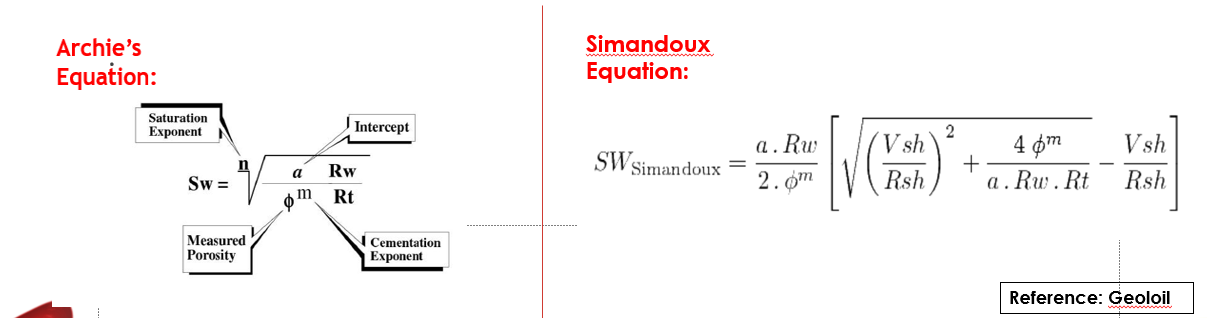

In [144]:
## Water saturation by Archie's equation
def sw_archie(Rw, Rt, PHIE, a, m, n):
    Swa =((a * Rw)/((PHIE**m)*Rt))**(1/n)
    return Swa
x4=sw_archie(0.02,logs_remove.RESD,NPHI,1,2,2)

x4.shape

(2011,)

To calculate the Simandoux equation, it is necessary to determine the values of Vsh (shale volume) and clay resistivity. These parameters are calculated as follows:

25.487725
175.996645


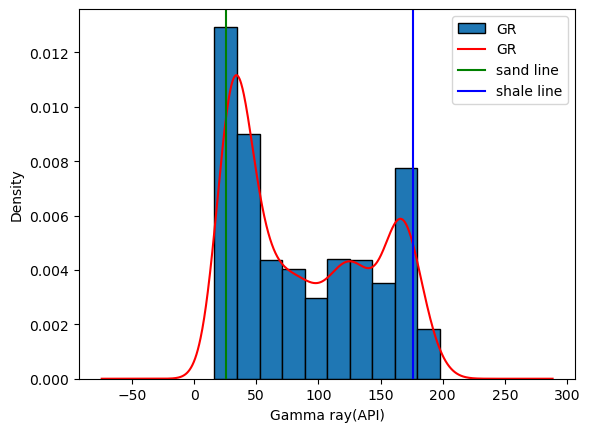

In [145]:
### Find out sand and shale line value to calculate the Volume of shale 

logs_remove.GR.plot(kind="hist",edgecolor="black",density=True)
logs_remove.GR.plot(kind="kde",color="red")
p5=logs_remove.GR.quantile(0.05)
p95=logs_remove.GR.quantile(0.95)
print(p5)
print(p95)
plt.axvline(p5,label="sand line",color="green")
plt.axvline(p95,label="shale line",color="blue")
plt.xlabel("Gamma ray(API)")

plt.legend()
plt.show()

C:\Users\RAJKUMAR MONDAL\AppData\Local\Temp\ipykernel_25268\1820553688.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)


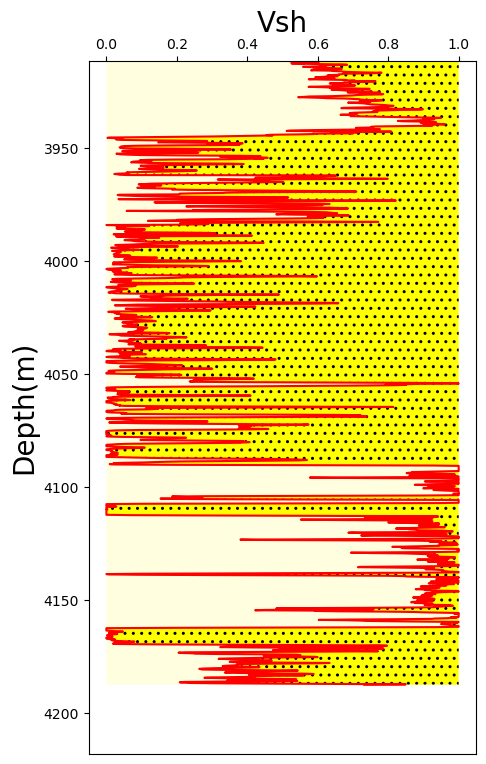

In [149]:
## plot of calculated shale volume

plt.subplots(figsize=(5,9))


def vsh(gr_min,gr_max,gr_log):
    return((gr_log-gr_min)/(gr_max-gr_min))
x1=vsh(25.487725,175.996645,logs_remove.GR)

## remove the -ve values of Vsh

for i in range(0,2011):
    if x1[i] < 0:
        x1[i]=0
    if x1[i] > 1:
        x1[i] = 1

ax=plt.subplot2grid((1,1),(0,0),rowspan=1,colspan=1)
ax.plot(x1,logs_remove.DEPTH,color="red")
ax.set_xlabel("Vsh", fontsize=20)
ax.set_ylabel("Depth(m)",fontsize=20)
ax.set_ylim(4218,3911.5)
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
plt.fill_betweenx(logs_remove.DEPTH,0,x1,facecolor="lightyellow")
plt.fill_betweenx(logs_remove.DEPTH,1,x1,facecolor="yellow",hatch='..')

    
plt.show()


In [150]:
## Create data frame for the shale zone to calculate the shale resistivity.

data2=logs_remove[(logs_remove['DEPTH']>=3911.5)&(logs_remove['DEPTH']<=3950)]
data3=logs_remove[(logs_remove['DEPTH']>=4120)&(logs_remove['DEPTH']<=4130)]
data4=logs_remove[(logs_remove['DEPTH']>=4140)&(logs_remove['DEPTH']<=4190)]

In [151]:
## Shale/clay resistivity calculation

mean2=data2.RESD.mean()
mean3=data3.RESD.mean()
mean4=data4.RESD.mean()
mean5=mean2+mean3+mean4

clay_res=mean5

In [152]:
## water saturation calcualtion by Simandoux's equation

def sw1(a,Rw,phi,m,Vsh,Rc,Rt):
    siman=((a*Rw)/(2*phi**m))*(((((Vsh/Rc)**2)+((4*phi**m)/(a*Rw*Rt)))**.5)-(Vsh/Rc))
    return siman
SW_siman=sw1(1,0.02,NPHI,2,x1,clay_res,logs_remove.RESD)

Mean Water Saturation (Archie): 0.20469273522132184
Mean Water Saturation (Simandoux): 0.20065462860506741


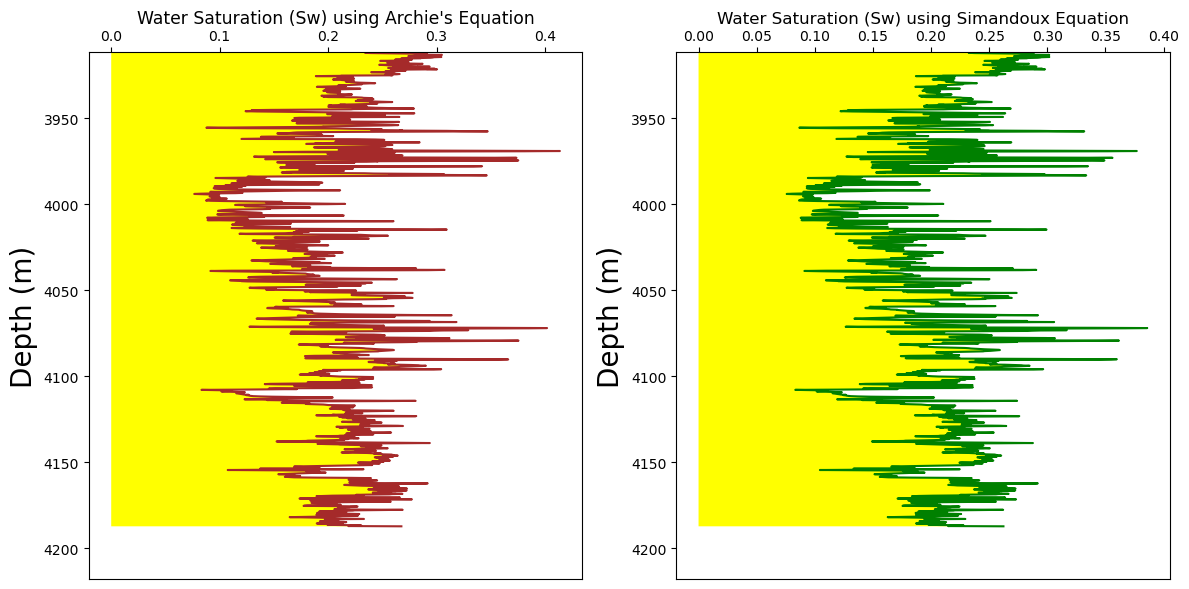

In [154]:
# Create a figure with two subplots arranged in one row and two columns
fig, (ax0, ax01) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting on the first axis
ax0.plot(x4, data.DEPTH, color="brown")
ax0.set_xlabel("Water Saturation (Sw) using Archie's Equation", fontsize=12.4)
ax0.set_ylabel("Depth (m)", fontsize=20)
ax0.set_ylim(4218, 3911.5)
ax0.xaxis.set_label_position("top")
ax0.xaxis.set_ticks_position("top")
ax0.fill_betweenx(data.DEPTH, 0, x4, facecolor="yellow")
mean1111_archie = x4.mean()
print("Mean Water Saturation (Archie):", mean1111_archie)

# Plotting on the second axis
ax01.plot(SW_siman, data.DEPTH, color="green")
ax01.set_xlabel("Water Saturation (Sw) using Simandoux Equation", fontsize=12)
ax01.set_ylabel("Depth (m)", fontsize=20)
ax01.set_ylim(4218, 3911.5)
ax01.xaxis.set_label_position("top")
ax01.xaxis.set_ticks_position("top")
ax01.fill_betweenx(data.DEPTH, 0, SW_siman, facecolor="yellow")
mean1111_simandoux = SW_siman.mean()
print("Mean Water Saturation (Simandoux):", mean1111_simandoux)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

INTERPRETATION:

The close proximity of the mean water saturation values derived from the Archie and Simandoux equations underscores their relative consistency. The slight difference of 0.40 percentage points highlights the sensitivity of water saturation calculations to the underlying model assumptions.

# Estimate NTG ratio (Cutoffs: Vsh < 50%, φ > 5% and Sw < 50%). 

 Net pay calculation: 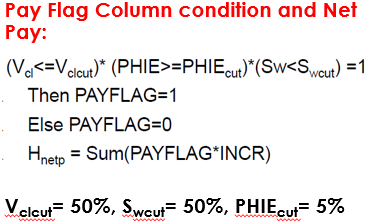
 
 Where INCR is step size of log data

In [14]:
import mplcursors

In [158]:
## Rise Reservoir flag using above condition.

yes_no = np.zeros(2011)
for i in range(2011):
    if x1[i+0] <0.50:
        if x4[i+0] <0.50:
            if NPHI[i+0]>.05:
                yes_no[i]=1
                

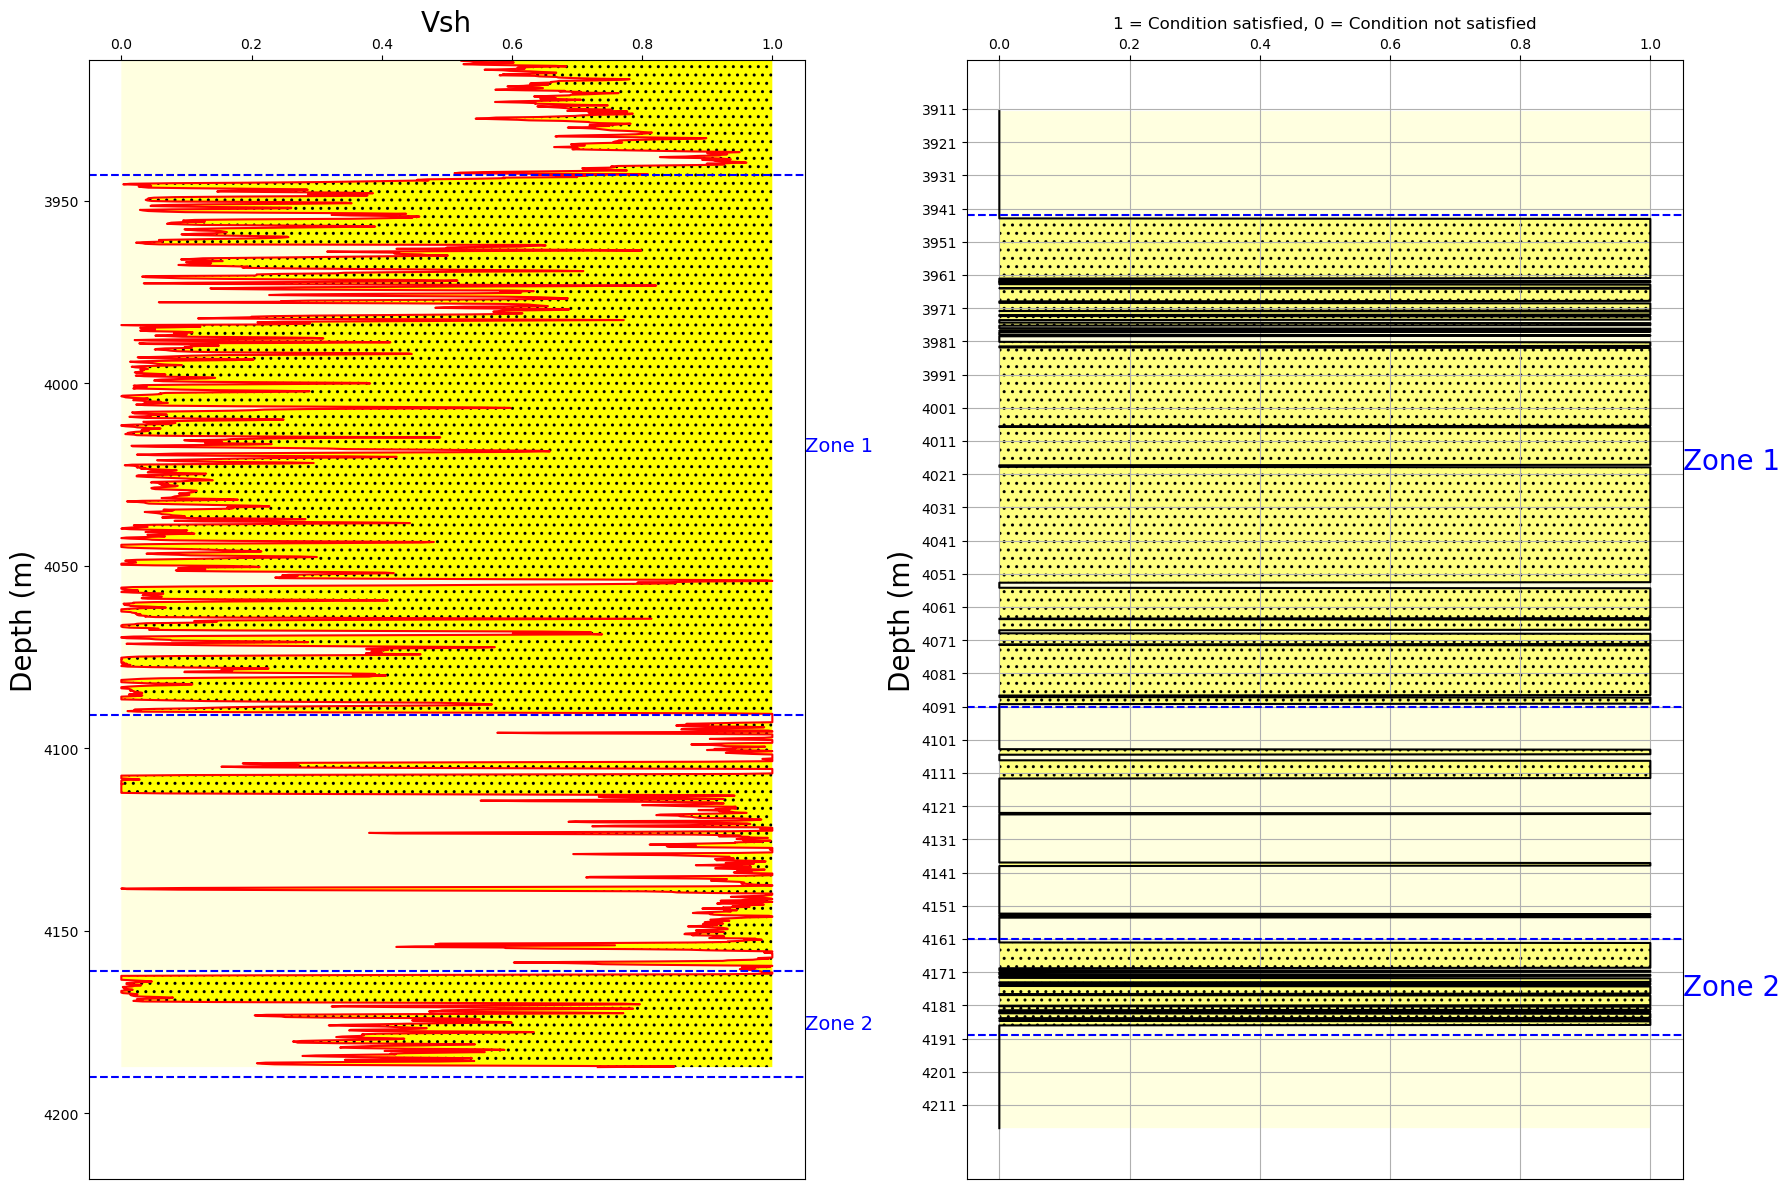

In [193]:
# Define depth range and points
depth_range = (4218, 3911.5)
zone_lines = [(3943, 4091), (4161, 4190)]  # Two sets of zone lines

# Create a figure with two subplots arranged in one row and two columns
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(18, 12))

# First subplot: Vsh plot
ax0.plot(x1, logs_remove.DEPTH, color="red")
ax0.set_xlabel("Vsh", fontsize=20)
ax0.set_ylabel("Depth (m)", fontsize=20)
ax0.set_ylim(depth_range)
ax0.xaxis.set_label_position("top")
ax0.xaxis.set_ticks_position("top")
ax0.fill_betweenx(logs_remove.DEPTH, 0, x1, facecolor="lightyellow")
ax0.fill_betweenx(logs_remove.DEPTH, 1, x1, facecolor="yellow", hatch='..')

# Adding horizontal lines and zone labels for both zones
for zone, label in zip(zone_lines, ['Zone 1', 'Zone 2']):
    ax0.axhline(y=zone[0], color='blue', linestyle='--')
    ax0.axhline(y=zone[1], color='blue', linestyle='--')
    ax0.text(1.05, (zone[0] + zone[1]) / 2, label, color='blue', va='center', fontsize=14, ha='left')

# Second subplot: yes_no plot
ax1.plot(yes_no, logs_remove.DEPTH, color='black')
ax1.set_ylabel("Depth (m)", fontsize=20)
ax1.set_title("1 = Condition satisfied, 0 = Condition not satisfied")
ax1.fill_betweenx(logs_remove.DEPTH, 0, yes_no, alpha=.5, hatch='..', facecolor="yellow")
ax1.fill_betweenx(logs_remove.DEPTH, 1, yes_no, facecolor="lightyellow")
ax1.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax1.invert_yaxis()
ax1.grid()
depth_ticks = list(range(int(depth_range[1]), int(depth_range[0]) + 1, 10))
ax1.set_yticks(depth_ticks)
ax1.set_yticklabels(depth_ticks)

# Adding horizontal lines and zone labels for both zones
for zone, label in zip(zone_lines, ['Zone 1', 'Zone 2']):
    ax1.axhline(y=zone[0], color='blue', linestyle='--')
    ax1.axhline(y=zone[1], color='blue', linestyle='--')
    ax1.text(1.05, (zone[0] + zone[1]) / 2, label, color='blue', va='center', fontsize=20, ha='left')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [195]:
## NET PAY calculation

Hnetp=np.cumsum(yes_no*0.1524)
total_Hnetp = Hnetp[-1]
total_Hnetp

161.69640000000007

NTG calculation: 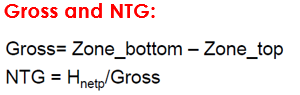

In [197]:
# Calculate gross thickness of the reservoir zones
gross = (4091 - 3943) + (4190 - 4161)

# Assuming total_Hnetp is already calculated
NTG = total_Hnetp / gross

print(f"Net-to-Gross (NTG) value of the reservoir zones is: {NTG:.4f}")

Net-to-Gross (NTG) value of the reservoir zones is: 0.9135


# Build empirical porosity-permeability relationship from core data (you can discard anomalous data point during regression analysis)

To build an empirical porosity-permeability relationship while discarding anomalous data points, follow these steps:

Step-by-Step Process:

Data Preparation: Ensure that there are no NaN (missing) or negative values in the data.

Filter Out Data Points w (Outliers):  remove outliers from the data.

Log Transform Both Porosity and Permeability After Filtering: Apply a logarithmic transformation to both porosity and permeability for linear regression.

Perform Linear Regression on the Log-Transformed Data: Conduct linear regression on the filtered, log-transformed data.

Convert Regression Coefficients Back to the Original Scale: Revert the intercept to the original scale for interpretation.

Provide the Empirical Relationship: Present the empirical porosity-permeability relationship equation.

In [211]:
## data preparation

# Example core data (replace with your actual data)
porosity = data1.porosity.values  # Core porosity data
permeability = data1.Permeability.values  # Core permeability data in mD

# Remove zero or negative values, as log cannot be applied
valid_data = (porosity > 0) & (permeability > 0)
porosity = porosity[valid_data]
permeability = permeability[valid_data]

# Remove any NaN values in case there are missing data points
valid_data = ~np.isnan(porosity) & ~np.isnan(permeability)
porosity = porosity[valid_data]
permeability = permeability[valid_data]


Best Threshold for Z-score Filtering: 2.60
Empirical Porosity-Permeability Relationship: k = 22882.107381 * φ^4.6619
Best R² Value: 0.3506
R² value is below 80%. Consider reviewing the data or model.


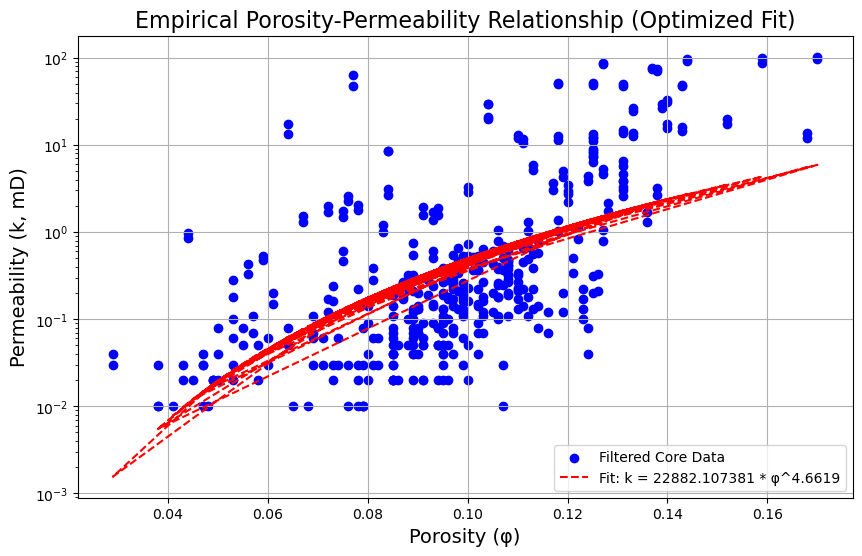

In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress, zscore

# Example core data (replace with your actual data)
porosity = data1.porosity.values / 100  # Convert porosity from percentage to fraction
permeability = data1.Permeability.values  # Core permeability data in mD

# Ensure no NaN or negative values in the dataset
valid_data = (porosity > 0) & (permeability > 0)  # Remove zero or negative values
porosity = porosity[valid_data]
permeability = permeability[valid_data]

# Initialize variables to store the best results
best_threshold = None
best_r2 = -np.inf
best_slope = None
best_intercept = None
best_filtered_porosity = None
best_filtered_permeability = None

# Loop through a range of threshold values to find the best fit
for threshold in np.arange(1.0, 4.0, 0.1):
    # Calculate Z-scores for both porosity and permeability
    z_scores_porosity = zscore(porosity)
    z_scores_permeability = zscore(permeability)

    # Filter out data points with high Z-scores (outliers)
    non_outliers = (np.abs(z_scores_porosity) < threshold) & (np.abs(z_scores_permeability) < threshold)
    filtered_porosity = porosity[non_outliers]
    filtered_permeability = permeability[non_outliers]

    # Ensure there are enough data points after filtering
    if len(filtered_porosity) > 2:  # At least 2 points needed for regression
        # Log transform both porosity and permeability after filtering
        log_porosity = np.log(filtered_porosity)
        log_permeability = np.log(filtered_permeability)

        # Perform linear regression on the log-transformed data
        slope, intercept, r_value, p_value, std_err = linregress(log_porosity, log_permeability)

        # Calculate the R² value
        r_squared = r_value**2

        # Check if this R² is the best so far
        if r_squared > best_r2:
            best_threshold = threshold
            best_r2 = r_squared
            best_slope = slope
            best_intercept = intercept
            best_filtered_porosity = filtered_porosity
            best_filtered_permeability = filtered_permeability

# Convert regression coefficients back to the original scale
a = np.exp(best_intercept)  # Intercept in original scale
b = best_slope  # Slope remains the same in log-log space

# Print the best empirical relationship and R² value
print(f"Best Threshold for Z-score Filtering: {best_threshold:.2f}")
print(f"Empirical Porosity-Permeability Relationship: k = {a:.6f} * φ^{b:.4f}")
print(f"Best R² Value: {best_r2:.4f}")

# Check if the R² value meets the target
if best_r2 >= 0.80:
    print("Achieved R² value of 80% or above.")
else:
    print("R² value is below 80%. Consider reviewing the data or model.")

# Plot the data and the best-fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(best_filtered_porosity, best_filtered_permeability, color='blue', label='Filtered Core Data')
plt.plot(best_filtered_porosity, a * best_filtered_porosity ** b, color='red', linestyle='--', label=f'Fit: k = {a:.6f} * φ^{b:.4f}')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Porosity (φ)', fontsize=14)
plt.ylabel('Permeability (k, mD)', fontsize=14)
plt.title('Empirical Porosity-Permeability Relationship (Optimized Fit)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


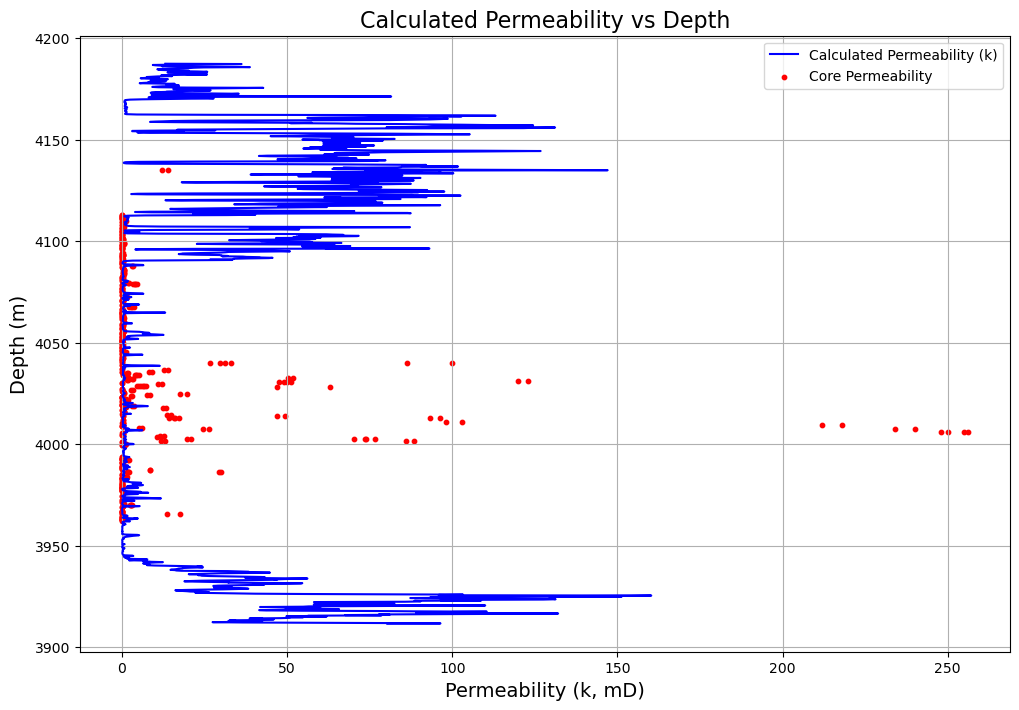

In [246]:

# Example core permeability and depth data
core_permeability = data1.Permeability.values  # Core permeability data in mD
core_depth = data1.DEPTH.values  # Core depth data in meters

# Empirical relationship parameters
a = 22882.107381
b = 4.6619

# Calculate permeability (k) using the empirical relationship
k = a * NPHI ** b



# Plot k against depth
plt.figure(figsize=(12, 8))
plt.plot(k, logs_remove.DEPTH, color='blue', label='Calculated Permeability (k)')
plt.scatter(data1.Permeability, core_depth, color='red', label='Core Permeability', s=10)
plt.xlabel('Permeability (k, mD)', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
plt.title('Calculated Permeability vs Depth', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


# Statistical analysis of Vsh,Sw,NPHI, and K

In [248]:
x1.describe() #volume of shale

count    1810.000000
mean        0.420752
std         0.360214
min         0.000000
25%         0.066873
50%         0.343184
75%         0.757977
max         1.000000
Name: GR, dtype: float64

In [249]:
x4.describe() # water saturation

count    1810.000000
mean        0.204693
std         0.050946
min         0.076543
25%         0.173247
50%         0.209560
75%         0.238825
max         0.413658
dtype: float64

In [250]:
NPHI.describe() #nutron porosity

count    1810.000000
mean        0.167681
std         0.082400
min         0.049490
25%         0.095818
50%         0.128985
75%         0.252400
max         0.344990
Name: TNPH, dtype: float64

In [251]:
k.describe() # permeability

count    1810.000000
mean       21.109508
std        30.989117
min         0.018770
25%         0.408408
50%         1.632750
75%        37.333300
max       160.249312
Name: TNPH, dtype: float64